<a href="https://colab.research.google.com/github/Mrigakshi24-ux/Training-Sheet/blob/main/PCA_Implementation_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA Implementation

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [ ]:
data = load_breast_cancer()

print(data['feature_names'])
print(data['target_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [ ]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
data_pd = pd.DataFrame(data['data'], columns = data['feature_names'])
# data_pd.head()

Scale/Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_data_X = StandardScaler().fit_transform(data_pd)
scaled_data_X[:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

Covariance matrix

In [ ]:
import numpy as np
# diagonal elements are variance and rest are covariance. 
transpose = scaled_data_X.T
cov_matrix = np.cov(transpose)
# prinitng first two rows of matrix
cov_matrix[:2]

array([[ 1.00176056,  0.32435193,  0.99961207,  0.98909547,  0.17088151,
         0.50701464,  0.67795504,  0.82397664,  0.14800135, -0.31217947,
         0.68028597, -0.09748878,  0.67535854,  0.7371592 , -0.22299203,
         0.20636266,  0.19454553,  0.37683123, -0.10450454, -0.04271634,
         0.97124591,  0.29753054,  0.9668357 ,  0.94273929,  0.11982673,
         0.41419075,  0.52783912,  0.74552443,  0.16424199,  0.00707833],
       [ 0.32435193,  1.00176056,  0.33011322,  0.32165099, -0.02342969,
         0.23711895,  0.30295025,  0.29398071,  0.07152669, -0.07657176,
         0.27635436,  0.38703783,  0.28216902,  0.26030246,  0.00662542,
         0.19231259,  0.14354535,  0.1641395 ,  0.00914324,  0.0545534 ,
         0.35319367,  0.9136503 ,  0.35866993,  0.34415078,  0.07763981,
         0.27831873,  0.3015552 ,  0.29583577,  0.10519278,  0.11941522]])

Eigendecomposition: Decomposition of square matrix into eigencevtors and eigenvalues

In [ ]:
# Principal components are sorted by the percentage of the variance explained.
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues[:2], eigenvectors[:2]

(array([13.30499079,  5.7013746 ]),
 array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
          4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
          1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
          9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
          1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
         -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
         -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
         -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
          1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
         -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
        [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
         -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
         -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
          2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
          2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
         -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
   

Calculating percentage of variance explained by components

In [ ]:
# with the give percentage of variances, we can check how many principal components will affect the data more. 
# first 8 components show around 90% variance
variances = []
for i in range(len(eigenvalues)):
  variances.append(eigenvalues[i]/np.sum(eigenvalues))
print(np.sum(variances), '\n', variances)

1.0000000000000004 
 [0.4427202560752638, 0.18971182044033097, 0.09393163257431388, 0.06602134915470141, 0.05495768492346264, 0.040245220398833506, 0.02250733712982507, 0.01588723800021325, 0.013896493745591054, 0.011689781894131487, 0.009797189875980158, 0.008705379007378812, 0.008045249871967322, 0.005233657454926358, 0.0031378321676273995, 0.0026620933651523124, 0.001979967925324275, 0.0017539594502263716, 0.0016492530592251552, 4.434827427354741e-06, 2.4960103246895918e-05, 5.297792903809098e-05, 0.00023001546250595825, 0.0002725879954774842, 0.0005160423791651998, 0.0006018335666716718, 0.0008113612588991022, 0.0009146467510543434, 0.001038646748338712, 0.0009990964637002565]


In [ ]:
# extracting the frst 8 vectors
pca = []
for i in range(8):
  pca.append(scaled_data_X.dot(eigenvectors.T[i]))
pca_comp = pd.DataFrame(np.asarray(pca).T,  columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8'] )
pca_comp.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424,-2.159370,0.398407
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656,-0.013358,-0.240988
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452,0.668166,-0.097374
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422,-1.429911,-1.059565
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495,0.936213,-0.636376


In [ ]:
pca_comp['target_variable'] = data['target']
pca_comp.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,target_variable
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424,-2.159370,0.398407,0
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656,-0.013358,-0.240988,0
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452,0.668166,-0.097374,0
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422,-1.429911,-1.059565,0
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495,0.936213,-0.636376,0


Text(0, 0.5, 'pc2')

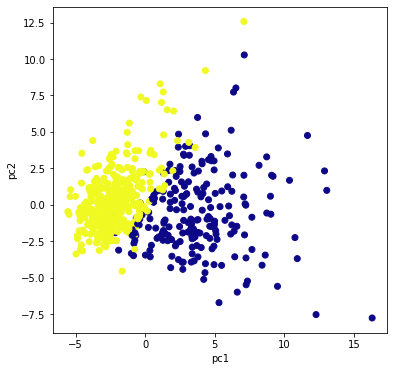

In [ ]:
# plotting first to prinicples
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(pca_comp.iloc[:,0],pca_comp.iloc[:,1],c=data['target'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')